### Load Basic Modules

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify



In [149]:
conda install -c conda-forge squarify


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/maia/opt/anaconda3/envs/dhdsblend2021

  added / updated specs:
    - squarify


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1n             |       h6c3fc93_0         1.9 MB  conda-forge
    squarify-0.4.3             |             py_0           7 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  squarify           conda-forge/noarch::squarify-0.4.3-py_0

The following packages will be UPDATED:

  openssl              pkgs/main::openssl-1.1.1m-hca72f7f_0 --> conda-forge::

### Loading the clean data after EDA

In [10]:
data = pd.read_csv('../data/data_limpia.csv', index_col= None)

In [11]:
data.head(2)

,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,AgeCat,new_weight,TAS,TAD,PP
0,2,168,62.0,1,1,0,0,1,0,50,21.97,Peso normal,40-60,"[50, 60)",62.0,110.0,80.0,30.0
1,1,156,85.0,3,1,0,0,1,1,55,34.93,Obesidad,40-60,"[50, 60)",85.0,140.0,90.0,50.0


**The next step is to create some visuals in order to understand further our dataset by exploring relationships existent in it. For this, it is very useful to use the `seaborn` library that we imported previously. Seaborn facilitates strong attractive statistical graphics that are easy to code**

In [ ]:
#TEMA GENERO: me parece rarisimo que sea masculino 1 y femenino 2 como dice en la web del DS, las mujeres son mucho mas altas y pesadas

(0.0, 0.4)

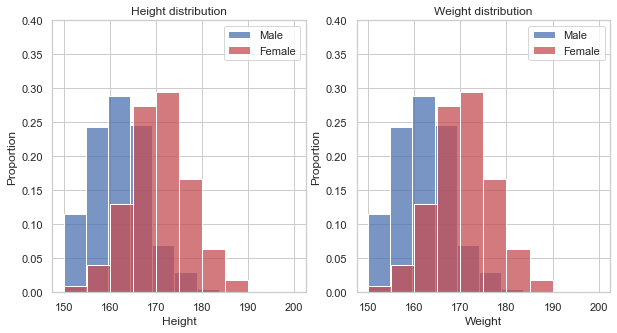

In [38]:
sns.set(style="darkgrid")
sns.set_style("whitegrid")
sns.set_context("notebook")

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)


data_male = data[data.gender == 1]
data_male_height= data_male.height
data_fem = data[data.gender == 2]
data_fem_height = data_fem.height

sns.histplot(data_male_height,  kde=False, bins = 10, label='male', stat = "probability", color = 'b')

sns.histplot(data_fem_height,  kde=False, label='female', bins = 10, color = 'r', stat = "probability")

plt.xlabel("height")
plt.xlabel("Height")
plt.ylabel("Proportion")
plt.title("Height distribution")
plt.legend(["Male", "Female"])
plt.ylim((0, 0.4))


plt.subplot(1, 2, 2)
sns.histplot(data_male_height,  kde=False, bins = 10, label='male', stat = "probability", color = 'b')
plt.xlabel("Weight")

sns.histplot(data_fem_height,  kde=False, label='female', bins = 10, color = 'r', stat = "probability")
plt.xlabel("Weight")
plt.ylabel("Proportion")
plt.title("Weight distribution")
plt.legend(["Male", "Female"])
plt.ylim((0, 0.4))

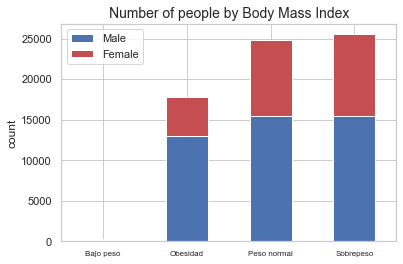

In [53]:
data_BMI = data.groupby(['BMICat', 'gender']).size().reset_index().pivot(columns='gender', index='BMICat', values=0)

data_BMI.plot(kind='bar', stacked=True, color = ('b', 'r'))
plt.title("Number of people by Body Mass Index",  fontsize=14)
plt.ylabel("count")
plt.xlabel(None) 
plt.legend(["Male", "Female"])


plt.xticks(fontsize = 8, rotation = 0)
plt.show()

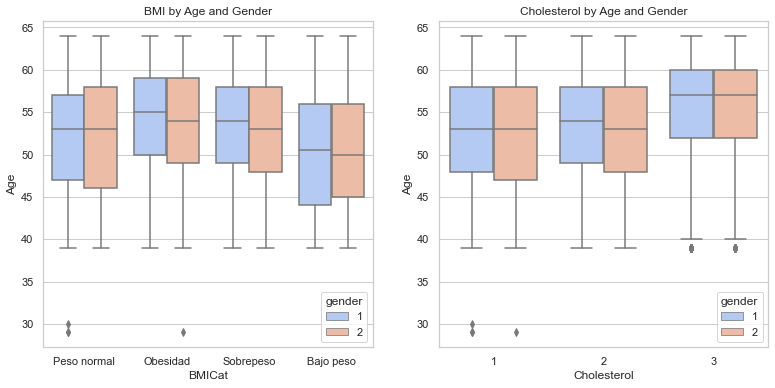

In [101]:
#QUE NOMBRE TENDRIAN LAS CATEGORIAS DE COLESTEROL????

plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)

ax = sns.boxplot(x="BMICat", y="AgeinYr", data=data, hue = 'gender', palette = "coolwarm")
plt.title("BMI by Age and Gender")
ax.set(ylabel="Age")

plt.subplot(1, 2, 2)
ax = sns.boxplot(x="cholesterol", y="AgeinYr", hue = 'gender', data=data, palette = "coolwarm")
plt.title("Cholesterol by Age and Gender")
ax.set(ylabel="Age")
ax.set(xlabel="Cholesterol")

plt.show()

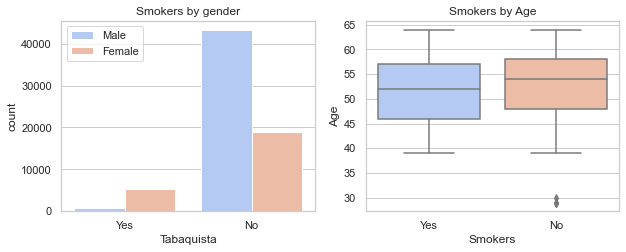

In [100]:

plt.figure(figsize=(10,3.5))
plt.subplot(1, 2, 1)

ax = sns.countplot(x= "smoke", data = data, hue = "gender", order = [1, 0], palette = "coolwarm")

plt.title("Smokers by gender")
plt.xlabel("Tabaquista")
ax.set_xticklabels(["Yes", "No"])
plt.legend(["Male", "Female"])

plt.subplot(1, 2, 2)
ax = sns.boxplot(y = "AgeinYr", data = data, x = "smoke", palette = "coolwarm", order = [1, 0])

plt.title("Smokers by Age")
plt.ylabel("Age")
plt.xlabel("Smokers")
ax.set_xticklabels(["Yes", "No"])

plt.show()

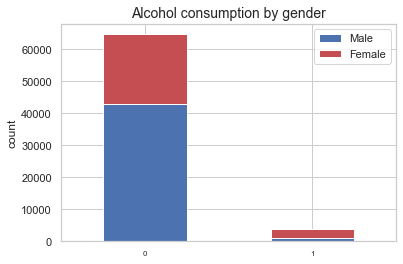

In [138]:
data_alco = data.groupby(['alco', 'gender']).size().reset_index().pivot(columns='gender', index='alco', values=0)

data_alco.plot(kind='bar', stacked=True, color = ('b', 'r'))
plt.title("Alcohol consumption by gender",  fontsize=14)
plt.ylabel("count")
plt.xlabel(None) 
plt.legend(["Male", "Female"])
plt.xticks(fontsize = 8, rotation = 0)

plt.show()


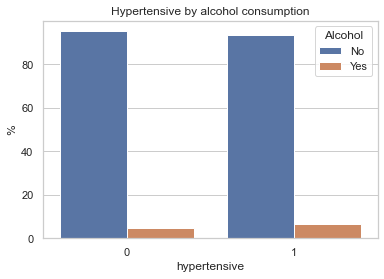

In [142]:
mask_hta_alta = data["TAS"] >= 140
mask_hta_baja = data["TAD"] >= 90
data["hipertenso"] = np.where(mask_hta_alta | mask_hta_baja, 1 ,0)

alco_counts = (data.groupby(['hipertenso'])['alco']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
alco_counts["alco"] = alco_counts["alco"].astype("str").map({"1": "Yes", "0": "No"})

sns.barplot(x = "hipertenso", y = "percentage", hue = "alco", data = alco_counts)

plt.title("Hypertensive by alcohol consumption")
plt.xlabel("Hypertensive")
plt.ylabel("%")
ax.set_xticklabels(["No", "Yes"])
plt.legend(title = "Alcohol")
plt.show()


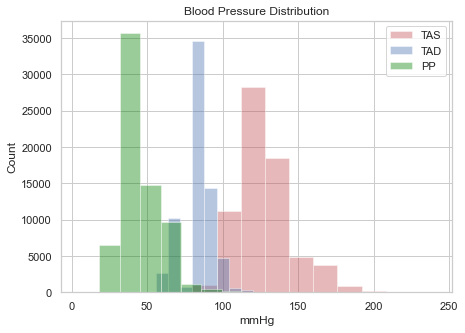

In [146]:
plt.figure(figsize=(7,5))
plt.title('Blood Pressure Distribution')
sns.distplot(data.TAS, bins=10, kde=False, color='r')
sns.distplot(data.TAD, bins=10, kde=False, color='b')
sns.distplot(data.PP, bins=10, kde=False, color='green')
plt.xlabel('mmHg'), plt.ylabel('Count')
plt.legend(['TAS','TAD','PP'])
plt.show()
# Distribuciones similar a normal

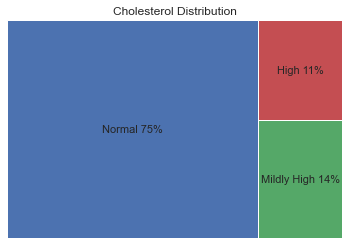

In [162]:
col_count = list(data.cholesterol.value_counts())
col_labels = ['Normal', 'Mildly High','High']
col_precent = list((data.cholesterol.value_counts(1)*100).round(0))
gen_label = zip(col_labels,col_precent)
labels =[str(l+' '+str(int(p))+'%') for l,p in gen_label]

squarify.plot(sizes=col_count, label=labels, color=['b','g','r'], text_kwargs={'fontsize':11})
plt.title('Cholesterol Distribution')
plt.axis('off')

plt.show()

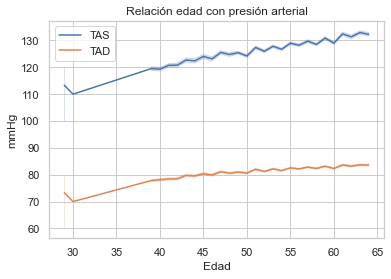

In [163]:
sns.lineplot(data=data,x='AgeinYr',y='TAS')
sns.lineplot(data=data,x='AgeinYr',y='TAD')
plt.title('Relación edad con presión arterial')
plt.xlabel('Edad')
plt.ylabel('mmHg')
plt.legend(['TAS','TAD'])

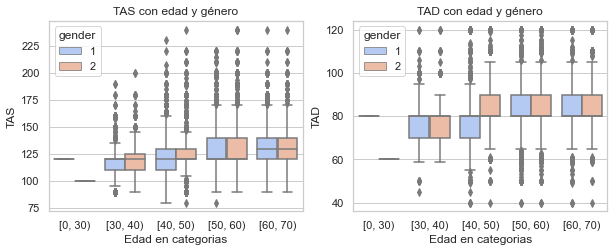

In [173]:
plt.figure(figsize=(10,3.5))
plt.subplot(1, 2, 1)

my_order = data.groupby('AgeCat')['TAS'].max().index
ax = sns.boxplot(data=data, x='AgeCat', y='TAS',order=my_order, hue='gender', palette = "coolwarm")
plt.xlabel('Edad en categorias')
plt.ylabel('TAS')
plt.title('TAS con edad y género')

plt.subplot(1, 2, 2)

my_order2 = data.groupby('AgeCat')['TAD'].max().index
ax = sns.boxplot(data=data, x='AgeCat', y='TAD', order=my_order, hue='gender', palette = "coolwarm")
plt.xlabel('Edad en categorias')
plt.ylabel('TAD')
plt.title('TAD con edad y género')
plt.show()

Text(0.5, 1.0, 'Niveles de colesterol en relación al grado de Diabetes')

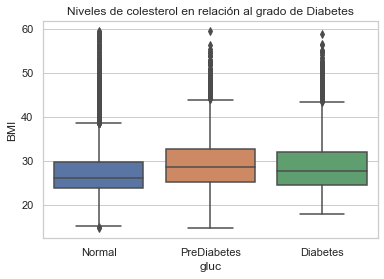

In [174]:
sns.boxplot(data=data, x='gluc', y='BMI')
plt.xticks([0,1,2],['Normal', 'PreDiabetes','Diabetes'])
plt.ylabel('BMI')
plt.title('Niveles de colesterol en relación al grado de Diabetes')

([<matplotlib.axis.XTick at 0x7f7cac36f910>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'PreDiabetes'), Text(2, 0, 'Diabetes')])

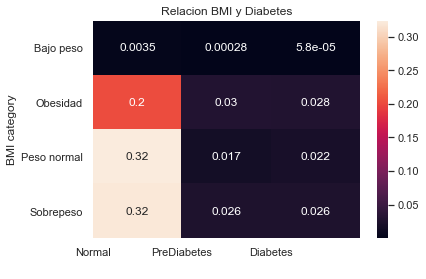

In [177]:
sns.heatmap(pd.crosstab(data.BMICat, data.gluc, normalize='all'), annot=True)
plt.title('Relacion BMI y Diabetes')
plt.ylabel('BMI category'), plt.xlabel(' ')
plt.xticks([0,1,2],['Normal', 'PreDiabetes','Diabetes'])

<AxesSubplot:xlabel='BMI', ylabel='TAD'>

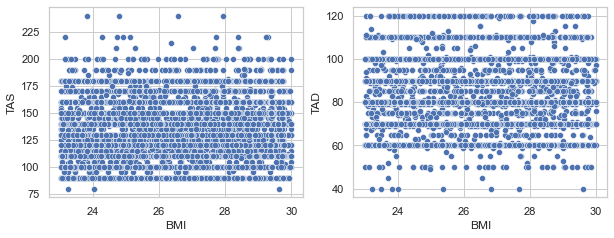

In [183]:
# Realicé el análisis tomando los valores en el IQ 25-75%, dejando afuera los valores outliers
#SI NO HAY CORR, vale la pena dejarlo?b
plt.figure(figsize=(10,3.5))
plt.subplot(1, 2, 1)
subdata = data[(data.BMI>=23)&(data.BMI<=30)]
sns.scatterplot(data=subdata, x='BMI', y ='TAS')
plt.subplot(1, 2, 2)

sns.scatterplot(data=subdata, x='BMI', y ='TAD')

Text(0.5, 1.0, 'Distribución de la presión de pulso entre pacientes con o sin antec cardiologicos')

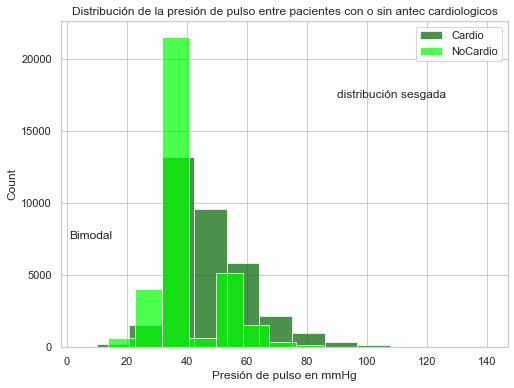

In [187]:
pp_cardio = data.PP[data.cardio ==1]
pp_NOcardio = data.PP[data.cardio ==0]
pp_cardio.describe()
plt.figure(figsize=(8,6))
pp_cardio.hist(alpha=0.7, color='darkgreen', bins=12)
pp_NOcardio.hist(alpha=0.7, color='lime', bins=14)
plt.legend(['Cardio','NoCardio'])
plt.text(90,17300,'distribución sesgada')
plt.text(1,7500,'Bimodal')
plt.xlabel('Presión de pulso en mmHg')
plt.ylabel('Count')
plt.title('Distribución de la presión de pulso entre pacientes con o sin antec cardiologicos')